**1 - Metodologia**
<p style='text-align: justify;'>
Para avaliar o desempenho inicial dos modelos, primeiramente foi feito um pré-processamento básico dos dados, a fim de remover possíveis inconsistências na base por meio de uma limpeza de dados. Após o pré-processamento destes dados, foram criados dois modelos de ML, um modelo utilizando Regressão Linear, e um segundo modelo contendo uma Rede Neural. A ideia é obter uma acurácia inicial a fim de se avaliar melhor o impacto que a Engenharia de Características teria em cima das métricas do modelo gerado.

Após a criação dos modelos iniciais, foi realizada uma Engenharia de Características em cima de determinadas características que foram julgadas que poderiam afetar a generalização do modelo. Netse processo, algumas características foram transformadas e outras removidas. Após esta parte, os modelos foram novamente treinados, e sua acurácia foi comparada com a do modelo inicial, com as características pouco modificadas.</p>

<p style='text-align: justify;'>Para treinar o modelo, o dataset foi dividido na seguinte proporção: 90% para o conjunto de treinamento, e 10% para o conjunto de teste.

O método utilizado para a validação do modelo foi o de Validação Cruzada utilizando k-partições. Este método consiste em dividir o dataset em k partições, cada partição sendo rotulada de 1 a k. Então, por k iterações cada uma destas partições será o conjunto de dados de teste, e as k - 1 partições restantes serão o conjunto de dados de treinamento.  A cada iteração realizada, a estimativa de erro do modelo, que consiste em quantas classificações incorretas foram feitas no conjunto de casos de teste, foi calculada. A estimativa total do erro do modelo será a soma das estimativas obtidas em cada iteração dividida por k. O valor de k escolhido foi igual a <b>10</b>, ou seja, estes modelos foram treinados utilizando um set de treino contendo 90% das amostras, e um set contendo os 10% restantes foi utilizado para validação do modelo.
</p>

<p style='text-align: justify;'>
Além da técnica de Validação Cruzada, a técnica de Matriz de Confusão também foi utilizada para avaliar a precisão do algoritmo. Como a Validação Cruzada apenas avalia qual foi a estimativa de erro calculada para todas as instâncias (ou seja, quantas instâncias foram incorretamente classificadas), a Matriz de Confusão fornece uma estimativa mais detalhada, em relação à classificação incorreta entre classes. Por meio da matriz de confusão, é possível verificar quantas instâncias foram corretamente classificadas, e quantas foram incorretamente classificadas. Neste desafio, o output esperado se resume a duas classes (se a renda do indivíduo é maior ou menor/igual a 50k), a matriz de confusão obtida possui tamanho 2x2. Com base nos resultados desta matriz, foi gerada uma curva ROC contendo a Taxa de Verdadeiro Positivo (TVP) no eixo X e a Taxa de Verdadeiro Negativo (TVN) no eixo Y.
</p>

**2 - Construção do primeiro modelo**
<p style='text-align: justify;'>
Este primeiro modelo têm como objetivo verificar a acurácia do modelo com modificações mínimas na base de dados, para que possa ser possível visualizar a diferença nas métricas de acurácia e log loss após a etapa de Engenharia de Características.

Portanto, nesta etapa o pré-processamento de dados se resumiu à limpeza dos dados, buscando possíveis características ausentes, e a transformação de dados categóricos para o tipo numérico, já que a implementação do algoritmo presente no pacote scikit-learn não permite a construção do modelo se alguma característica do exemplo for uma string.

A variável <i>rs</i> é utilizada para que todos os métodos que utilizem <i>randomState</i> como parâmetro executem da mesma forma a cada execução do Notebook.

</p>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.cross_validation import cross_val_score
import scikitplot as skplt

import sklearn.preprocessing as preprocessing
import seaborn as sns

data = pd.read_csv('/home/hialo/Downloads/census.csv')

rs = 30

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<p style='text-align: justify;'>
Primeiramente, foi verificado se existia alguma característica ausente nos exemplos presentes na base de dados. Por meio do método <i>isnull()</i>, é possível verificar se existe algum campo vazio ou igual a nulo (ou NaN) nas colunas. Como pode ser visto, o método retornou zero para todas as colunas, o que indica que a base passou por uma limpeza inicial aonde possíveis exemplos com características ausentes foram removidos.
</p>

In [2]:
data.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<p style='text-align: justify;'>
Aqui, é possível verificar que a base está classificada na seguinte proporção: 75%  dos exemplos recebem menos ou igual a 50k anuais, e cerca de 25% recebem mais de 50k anuais.
</p>

In [3]:
data["income"].value_counts()

<=50K    4139
>50K     1393
Name: income, dtype: int64

<p style='text-align: justify;'>
Aqui, foi iniciada a preparação da base de dados para construção do modelo. Como existem apenas dois outputs possíveis, as strings referentes à renda dos exemplos foram substituidos por 0 e 1. Além disso, as características que possuiam uma variável categórica do tipo string foram substituídas por um valor numérico (por exemplo, se uma determinada classe possuía 5 possíveis classes, as strings referentes à estas classes foram substituídas por valores de 0 a 4). Esta modificação foi necessária por limitação dos modelos presentes no pacote scikit, que permitem o treinamento apenas com variáveis numéricas.
</p>

In [4]:
data['income'] = data['income'].map({"<=50K": 0, ">50K": 1})
output = data['income'].values

data.drop("income", axis=1, inplace=True,)

def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result

data = number_encode_features(data)

In [5]:
data.head(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,5,9,13,4,0,1,4,1,2174,0,40,36
1,50,4,9,13,2,3,0,4,1,0,0,13,36
2,38,2,11,9,0,5,1,4,1,0,0,40,36
3,53,2,1,7,2,5,0,2,1,0,0,40,36
4,28,2,9,13,2,9,5,2,0,0,0,40,4
5,37,2,12,14,2,3,5,4,0,0,0,40,36
6,49,2,6,5,3,7,1,2,0,0,0,16,20
7,52,4,11,9,2,3,0,4,1,0,0,45,36
8,31,2,12,14,4,9,1,4,0,14084,0,50,36
9,42,2,9,13,2,3,0,4,1,5178,0,40,36


<p style='text-align: justify;'>
Este método é responsável pela criação dos sets de treinamento e teste. Já que poucos dados foram disponibilizados para a criação do modelo, optou-se pela divisão de 90/10 para os sets de treinamento e teste, sendo x referente aos exemplos e y, aos outputs (ou seja, a classe que cada exemplo pertence, já que estamos falando de um problema de aprendizado supervisionado). O parâmetro <i>stratify</i> garante que os splits gerados a partir do dataset original contenham uma proporção igual de exemplos (ou seja, 75% dos exemplos pertencentes à classe 0, 25% pertencente à classe 1).
</p>

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, output, test_size=0.1, stratify = output, random_state=rs)

print ("Tamanho da matriz do set de treino: {0}{1}".format(x_train.shape, y_train.shape))
print ("Tamanho da matriz do set de teste (validação): {0}{1}".format(x_test.shape, y_test.shape))

Tamanho da matriz do set de treino: (4978, 13)(4978,)
Tamanho da matriz do set de teste (validação): (554, 13)(554,)


<p style='text-align: justify;'>
Neste bloco, os modelos são instanciados e construídos. Primeiramente, temos um objeto responsável por realizar a criação dos "folds" que serão utilizados na Validação Cruzada do algoritmo. A variável <i>result</i> contém a acurácia do modelo, e a média desta acurácia é considerada a acurácia obtida no método de Validação Cruzada.

Logo abaixo, o modelo é treinado com o set de treinamento obtido anteriormente, e o mesmo efetua as predições baseado nos exemplos presente no set de teste. Então, é calculada a acurácia, quantos exemplos foram corretamente e incorretamente predizidos(por meio da matriz de confusão), e com base nas probabilidades obtidas em cada exemplo do set de teste, é calculado o _log loss_ do modelo. E no final da execução, são gerados os gráficos da linha ROC do modelo.
</p>

 
---------- Regressão Linear ----------
-> Acurácia utilizando validação cruzada: 0.810968166323
-> Acurácia sem validação cruzada: 0.823104693141
-> Log Loss: 0.413656882634
-> Matriz de confusão: 
[[400  14]
 [ 84  56]]


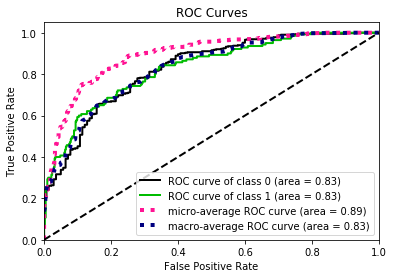

 
---------- Redes Neurais ----------
-> Acurácia utilizando validação cruzada: 0.787862412015
-> Acurácia sem validação cruzada: 0.785198555957
-> Log Loss: 0.638797975678
-> Matriz de confusão: 
[[404  10]
 [109  31]]


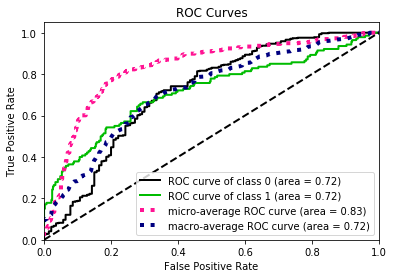

In [7]:
models = []
names = ["Regressão Linear", "Redes Neurais"]

models.append(LogisticRegression())
models.append(MLPClassifier())

kfold = model_selection.StratifiedKFold(n_splits=10, random_state=rs)

for i in range(0, len(models)):
    model = models[i]
    
    print (" ")
    print ('-' * 10 + ' ' + names[i] + ' ' + '-' * 10)
    
    result = model_selection.cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy')
    
    print("-> Acurácia utilizando validação cruzada: %.12f" % (result.mean()))

    model.fit(x_train, y_train)

    prediction_values = model.predict(x_test)
    prediction_probabilities = model.predict_proba(x_test)
    
    print ('-> Acurácia sem validação cruzada: {0}'.format(accuracy_score(y_test, prediction_values)))
    print ('-> Log Loss: {0}'.format(log_loss(y_test, prediction_probabilities)))
    print ('-> Matriz de confusão: ')
    print (confusion_matrix(y_test, prediction_values))

    skplt.metrics.plot_roc(y_test, prediction_probabilities)
    plt.show()

In [8]:
#################################################################################################

**3 - Engenharia de Características**

<p style='text-align: justify;'>Após a construção do primeiro modelo, foram efetuadas algumas modificações nos dados presentes na base a fim de melhorar a acurácia dos mesmos. Primeiramente, um novo DataFrame com os dados foi carregado, e com base neste DataFrame, foi criada uma matriz de correlação a fim de se verificar se alguma variável é fortemente relacionada com outra.</p>

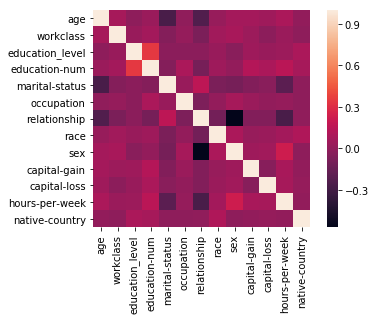

In [9]:
new_data = pd.read_csv('/home/hialo/Downloads/census.csv')

sns.heatmap(data.corr(), square=True)
plt.show()

<p style='text-align: justify;'>
Como pode ser visto no gráfico acima, as variáveis <i>education_level</i> e <i>education-num</i> são fortemente relacionadas uma com a outra. Ao se verificar o seu conteúdo, é possível notar que a característica <i>education_level</i> nada mais é do que a própria <i>education-num</i> em formato de string. Portanto, são variáveis consideradas redundantes, e por isso a variável <i>education_level</i> foi removida, já que a mesma seria transformada em uma característica numérica por conta da limitação da implementação do algoritmo.
</p>



In [10]:
new_data.drop("education_level", axis=1, inplace=True,)

<p style='text-align: justify;'>
Em relação às características <i>workclass</i> e <i>marital-status</i>, é possível reduzir a dimensionalidade das mesmas, agrupando algumas das características em um grupo mais amplo.

Na característica _workclass_, é possível inferir que as classes federal-gov, local-gov e state-gov podem ser agrupadas em uma única classe gov. Mesma situação com as classes self-emp-inc e self-emp-not-inc. A classe private continua com a mesma classificação.

No caso da característica _marital-status_, é possível reduzir as 7 classes para apenas 3: married, not-married e never-married, que continua sendo uma classe à parte.
</p>

In [11]:
def workClass(data):
        if data['workclass'] == ' Federal-gov' or data['workclass']== ' Local-gov' or data['workclass']==' State-gov': 
            return 'gov'
        elif data['workclass'] == ' Private':
            return 'private'
        elif data['workclass'] == ' Self-emp-inc' or data['workclass'] == ' Self-emp-not-inc': 
            return 'self-emp'
        else: 
            return 'without_pay'

def maritalStatus(data):
        if data['marital-status'] == ' Married-civ-spouse' or data['marital-status']== ' Married-spouse-absent' or data['marital-status']==' Married-AF-spouse': 
            return 'married'
        elif data['marital-status'] == ' Private':
            return 'private'
        elif data['marital-status'] == ' Divorced' or data['marital-status'] == ' Separated' or data['marital-status'] == ' Widowed': 
            return 'not-married'
        else: 
            return 'never-married'

new_data['workclass'] = new_data.apply(workClass, axis=1)
new_data['marital-status'] = new_data.apply(maritalStatus, axis=1)


In [12]:
values = new_data['native-country'].value_counts().keys().tolist()
counts = new_data['native-country'].value_counts().tolist()

print values
print counts

[' United-States', ' Mexico', ' Canada', ' Philippines', ' Germany', ' Puerto-Rico', ' Cuba', ' England', ' El-Salvador', ' Dominican-Republic', ' Jamaica', ' China', ' Poland', ' India', ' Guatemala', ' Italy', ' Vietnam', ' Japan', ' Taiwan', ' Iran', ' Greece', ' South', ' Portugal', ' Haiti', ' Columbia', ' Cambodia', ' Ireland', ' Nicaragua', ' Ecuador', ' Trinadad&Tobago', ' Laos', ' France', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Thailand', ' Honduras', ' Yugoslavia', ' Scotland', ' Hong']
[5034, 119, 30, 25, 25, 21, 19, 18, 18, 15, 15, 15, 13, 13, 12, 12, 12, 12, 12, 11, 9, 9, 8, 6, 6, 5, 5, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 1]


<p style='text-align: justify;'>
Como é possível ver acima, na característica <i>native-country</i>, os Estados Unidos são responsáveis por mais de 90% dos exemplos presentes na base (o que faz sentido, já que a base faz parte de um censo realizado nos EUA). Portanto, afim de reduzir a quantidade de classes presentes nessa característica, estas classes foram transformadas em um binário: 0 caso <b>não</b> sejam dos Estados Unidos, e 1 caso sejam de lá.
</p>

In [13]:
def country(data):
        if data['native-country'] == ' United-States':
            return 1
        else:
            return 0

new_data['native-country'] = new_data.apply(country, axis=1)

<p style='text-align: justify;'>
Ainda tendo com objetivo a redução da dimensionalidade do problema, foi analisada a variável contínua <i>age</i>. Conforme é possível ver no histograma, a maioria dos exemplos se concentra na parte esquerda do gráfico, com algums poucos exemplos possuindo mais de 80 anos.

Para tratar esta variável contínua, foi utilizado o conceito de <i>binning</i>. Em vez de possuir diversos valores espalhados pela base, estes valores contínuos foramagrupados em certos intervalos. No caso deste problema, o intervalo criado foi de 10 em 10 anos, ou seja, a variável age deixou de ser uma variável contínua e se tornou uma variável discreta, indo de 0 até 9 (já que o maior valor encontrado na base é de menos de 100 anos).
</p>

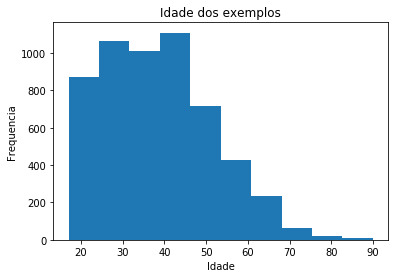

In [14]:
plt.hist(new_data['age'])

plt.title('Idade dos exemplos')
plt.xlabel('Idade')
plt.ylabel('Frequencia')

plt.show()

# criação das novas classes que irão conter os valores contínuos de age
new_data['agebin'] = np.array(np.floor(np.array(new_data['age']) / 10.))

<p style='text-align: justify;'>Em relação às características <i>capital-gain</i> e <i>capital-loss</i>, é possível observar que em sua grande maioria (mais de 90% dos exemplos), o valor destas variáveis é zero, quase que servindo como um idenfiticador nos exemplos na qual a mesma possui um valor específico. Portanto, estas variáveis foram removidas a fim de evitar <i>overfitting</i>, ajudando na generalização do modelo.</p>
   


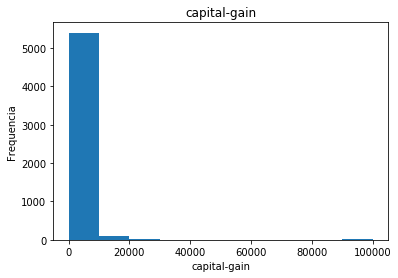

In [15]:
plt.hist(new_data['capital-gain'])

plt.title('capital-gain')
plt.xlabel('capital-gain')
plt.ylabel('Frequencia')

plt.show()

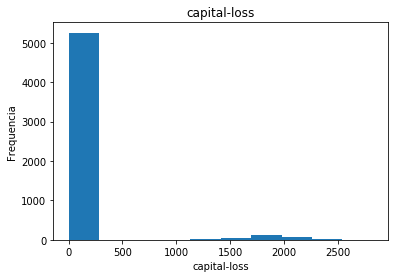

In [16]:
plt.hist(new_data['capital-loss'])

plt.title('capital-loss')
plt.xlabel('capital-loss')
plt.ylabel('Frequencia')

plt.show()

<p style='text-align: justify;'>
Desta vez, em vez de usar o método <i>LabelEncoder()</i> para gerar categorias numéricas para nossas características em formato de string, foi utilizado o conceito de <b>one-hot-encoding</b>, que nada mais é que uma binarização destas características. Ou seja, se em uma determinada característica nós temos <i>k</i> classes, <i>k</i> novas características serão criadas, com o valor 1 na classe na qual a característica pertencia, e 0 nas outras.
</p>

In [17]:
new_data = pd.get_dummies(new_data, columns=["workclass", "marital-status", "occupation", "relationship", "race", "sex", "native-country"])

<p style='text-align: justify;'>
Aqui, finalizamos o processamento do conjunto de dados removendo as colunas que não serão mais utilizadas, e gerando a coluna de output dos exemplos. A base de dados agora possui a seguinte aparência:
</p>

In [18]:
new_data["income"].value_counts()
new_data['income'] = new_data['income'].map({"<=50K": 0, ">50K": 1})
output = new_data['income'].values

new_data.drop("age", axis=1, inplace=True,)
new_data.drop("income", axis=1, inplace=True,)

new_data.drop("capital-gain", axis=1, inplace=True,)
new_data.drop("capital-loss", axis=1, inplace=True,)

new_data.head(20)

,education-num,hours-per-week,agebin,workclass_gov,workclass_private,workclass_self-emp,workclass_without_pay,marital-status_married,marital-status_never-married,marital-status_not-married,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_0,native-country_1
0,13,40,3.0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
1,13,13,5.0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,9,40,3.0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
3,7,40,5.0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
4,13,40,2.0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
5,14,40,3.0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,1
6,5,16,4.0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
7,9,45,5.0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
8,14,50,3.0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
9,13,40,4.0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


<p style='text-align: justify;'>
Geração dos sets de treinamento e teste. A construção dos novos modelos seguem os mesmos passos utilizados na construção do primeiro modelo.
</p>

In [19]:
x_train, x_test, y_train, y_test = train_test_split(new_data, output, test_size=0.1, stratify=output, random_state=rs)

print ("Tamanho da matriz do set de treino: {0}{1}".format(x_train.shape, y_train.shape))
print ("Tamanho da matriz do set de teste (validação): {0}{1}".format(x_test.shape, y_test.shape))

Tamanho da matriz do set de treino: (4978, 39)(4978,)
Tamanho da matriz do set de teste (validação): (554, 39)(554,)


 
---------- Regressão Linear ----------
-> Acurácia utilizando validação cruzada: 0.822219232612
-> Acurácia sem validação cruzada: 0.828519855596
-> Log Loss: 0.343322689741
-> Matriz de confusão: 
[[376  38]
 [ 57  83]]


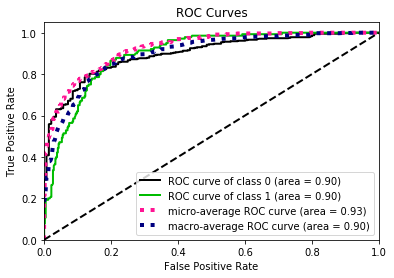

 
---------- Redes Neurais ----------
-> Acurácia utilizando validação cruzada: 0.820609175491
-> Acurácia sem validação cruzada: 0.830324909747
-> Log Loss: 0.344862773549
-> Matriz de confusão: 
[[382  32]
 [ 62  78]]


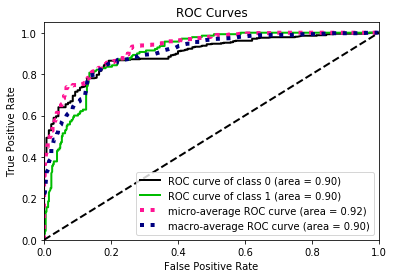

In [20]:
models = []
names = ["Regressão Linear", "Redes Neurais"]

models.append(LogisticRegression())
models.append(MLPClassifier())

kfold = model_selection.StratifiedKFold(n_splits=10, random_state=rs)

for i in range(0, len(models)):
    model = models[i]
    
    print (" ")
    print ('-' * 10 + ' ' + names[i] + ' ' + '-' * 10)
    
    result = model_selection.cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy')
    
    print("-> Acurácia utilizando validação cruzada: %.12f" % (result.mean()))

    model.fit(x_train, y_train)

    prediction_values = model.predict(x_test)
    prediction_probabilities = model.predict_proba(x_test)
    
    print ('-> Acurácia sem validação cruzada: {0}'.format(accuracy_score(y_test, prediction_values)))
    print ('-> Log Loss: {0}'.format(log_loss(y_test, prediction_probabilities)))
    print ('-> Matriz de confusão: ')
    print (confusion_matrix(y_test, prediction_values))

    skplt.metrics.plot_roc(y_test, prediction_probabilities)
    plt.show()

**4 - Conclusão**
<p style='text-align: justify;'>
Houve uma melhora em relação ao desempenho do segundo modelo em comparação ao primeiro: pelos sets serem divididos de forma randômica, a cada execução do Notebook as métricas do modelo são modificadas, porém em diversas execuções, o modelo criado utilizando a base que passou pela Engenharia de Características registrou aumento de 3 a 5% na acurácia em relação ao modelo criado utilizando a base "crua". Na última execução, os dados obtidos foram:
</p>

<b>Modelo inicial:</b>
    
Regressão Linear: acurácia de 82.3%, log loss de 0.413.
    
Rede Neural: acurácia de 78.5%, log loss de 0.630

<b>Modelo final:</b>
    
Regressão Linear: acurácia de 82.8%, log loss de 0.343.
    
Rede Neural: acurácia de 83.0%, log loss de 0.344

<p style='text-align: justify;'>
A melhora é significativa principalmente na rede neural. Sendo assim, acredito que o objetivo do desafio foi alcançado, apesar da melhoria entre os modelos ter sido relativamente pequena.
</p>